In [ ]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

Step:1 Data load


Objeactive: Load image and label from the dataset directory


Explanantion:

.We lod all images from subfolders

.Resize all image to (64,64)for uniformity

.Store images in X and corresponding labels in Y

In [ ]:
import os

data_dir = '/content/drive/MyDrive/Day1/Plant diseases'
categories = os.listdir(data_dir)

#Load images and labels
images = []
labels = [] #labels was missing from the original code

for category in categories:
    #print(category)
    folder_path = os.path.join(data_dir, category)
    for img_file in os.listdir(folder_path): # Changed '=' to 'in'
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path) # Removed extra '='
        if img is not None:
            img = cv2.resize(img, (64, 64)) #Resize to uniform size
            images.append(img)
            labels.append(category)

#convert to numpy arrays
x = np.array(images)
y = np.array(labels)
print("labels:",np.unique(y))
print("Data shapes:",x.shape)

labels: ['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy']
Data shapes: (340, 64, 64, 3)


Step:2 Data Description

Class Distribution:
Potato___Early_blight            80
Potato___healthy                 70
Potato___Late_blight             70
Pepper__bell___Bacterial_spot    60
Pepper__bell___healthy           60
Name: count, dtype: int64


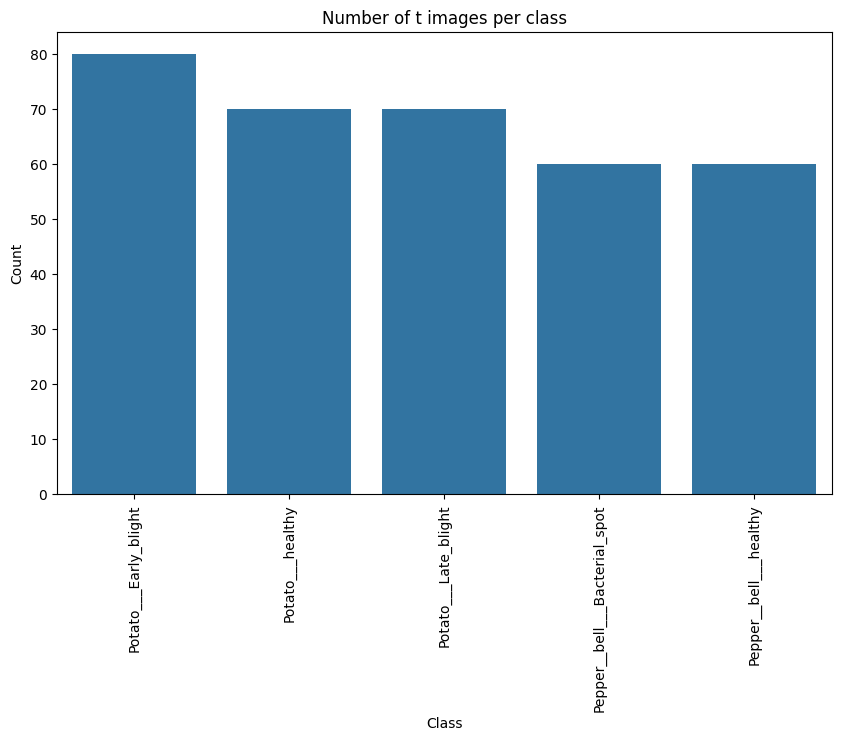

In [ ]:
# Count images per class
class_counts = pd.Series(labels).value_counts()
print("Class Distribution:")
print(class_counts)

# plot class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=90)
plt.title("Number of t images per class")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Step:3 Data Cleaning

In [ ]:
# Remove correupted images (if any)
valid_images = []
valid_labels = []

for img, label in zip(x , y):
    if img.shape == (64, 64, 3): #Ensure all images are valid
        valid_images.append(img)
        valid_labels.append(label)

        x = np.array(valid_images)
        y = np.array(valid_labels)

        print("Cleaned Data shape:",x.shape)

Cleaned Data shape: (1, 64, 64, 3)
Cleaned Data shape: (2, 64, 64, 3)
Cleaned Data shape: (3, 64, 64, 3)
Cleaned Data shape: (4, 64, 64, 3)
Cleaned Data shape: (5, 64, 64, 3)
Cleaned Data shape: (6, 64, 64, 3)
Cleaned Data shape: (7, 64, 64, 3)
Cleaned Data shape: (8, 64, 64, 3)
Cleaned Data shape: (9, 64, 64, 3)
Cleaned Data shape: (10, 64, 64, 3)
Cleaned Data shape: (11, 64, 64, 3)
Cleaned Data shape: (12, 64, 64, 3)
Cleaned Data shape: (13, 64, 64, 3)
Cleaned Data shape: (14, 64, 64, 3)
Cleaned Data shape: (15, 64, 64, 3)
Cleaned Data shape: (16, 64, 64, 3)
Cleaned Data shape: (17, 64, 64, 3)
Cleaned Data shape: (18, 64, 64, 3)
Cleaned Data shape: (19, 64, 64, 3)
Cleaned Data shape: (20, 64, 64, 3)
Cleaned Data shape: (21, 64, 64, 3)
Cleaned Data shape: (22, 64, 64, 3)
Cleaned Data shape: (23, 64, 64, 3)
Cleaned Data shape: (24, 64, 64, 3)
Cleaned Data shape: (25, 64, 64, 3)
Cleaned Data shape: (26, 64, 64, 3)
Cleaned Data shape: (27, 64, 64, 3)
Cleaned Data shape: (28, 64, 64, 3)
C

Step:4 Data manipulation (Label Encoding)

In [ ]:
#Encoded labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Save class names for later use
class_names = le.classes_
print(y_encoded)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4]


Step:5 Visualization

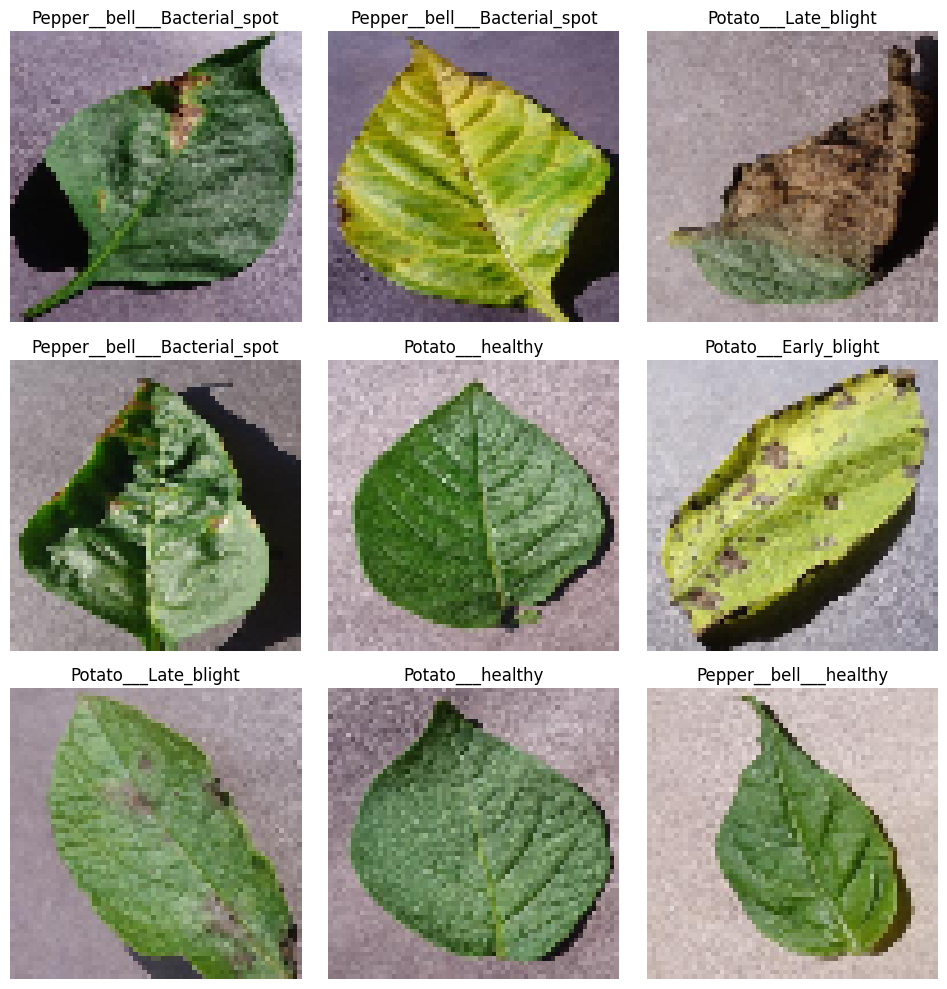

In [ ]:
# Show sample images
import random
plt.figure(figsize=(10, 10))
for i in range(9):
    idx = random.randint(0, len(x))
    plt.subplot(3, 3, i + 1)
    plt.imshow(cv2.cvtColor(x[idx], cv2.COLOR_BGR2RGB)) #Convert  to BGR
    plt.title(class_names[y_encoded[idx]])
    plt.axis('off')
    plt.tight_layout()
plt.show()

step:6 Features engineering (color histogram)

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    # convert to HSV color space
    images = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([images], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

    # Extract features
    hist_features =[extract_color_histogram(img) for img in x]
    X_features = np.array(hist_features)

Step:7 Model Selection: Logistic Regression /SVM

In [ ]:
# Choose model
#model = LogisticRegression(max_iter-1000)
model = SVC(kernel='rbf',gamma='scale')

Step:8 Traning the Model

In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_encoded, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

Step:9 Model Evaluation

Accuracy: 0.8235294117647058
F1 Score: 0.8273876536260436


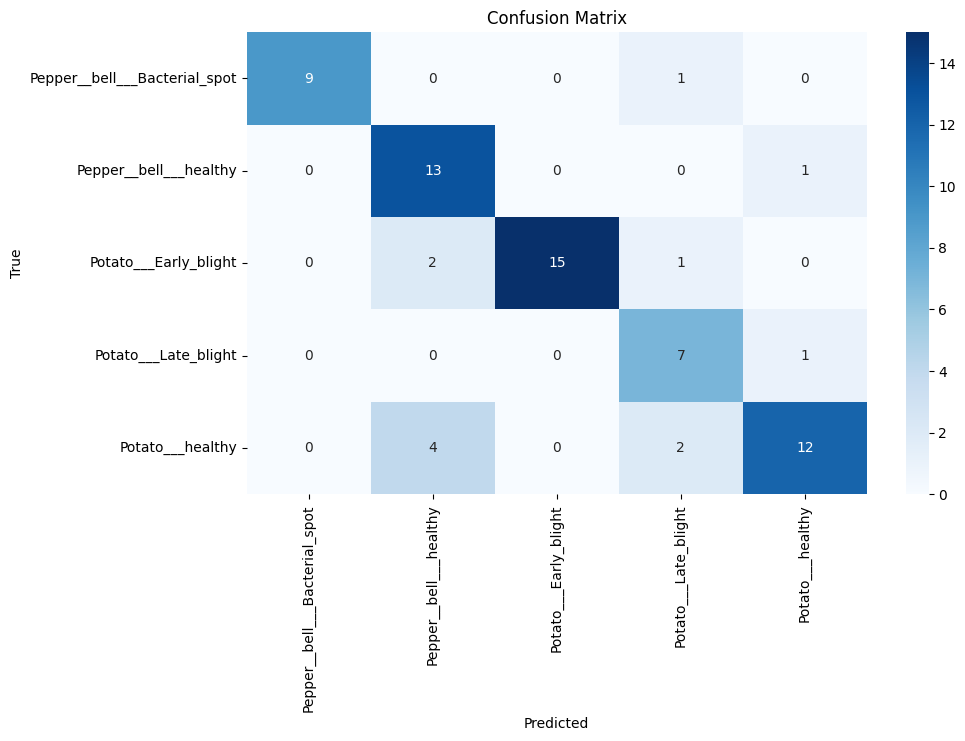

Classification Report:
                                precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       1.00      0.90      0.95        10
       Pepper__bell___healthy       0.68      0.93      0.79        14
        Potato___Early_blight       1.00      0.83      0.91        18
         Potato___Late_blight       0.64      0.88      0.74         8
             Potato___healthy       0.86      0.67      0.75        18

                     accuracy                           0.82        68
                    macro avg       0.84      0.84      0.83        68
                 weighted avg       0.85      0.82      0.83        68



In [ ]:
from sklearn.metrics import accuracy_score,f1_score ,confusion_matrix, classification_report
#accuracy
acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)


f1 = f1_score(y_test,y_pred, average='weighted')
print("F1 Score:",f1)

#confusion matrix
cm = confusion_matrix(y_test,y_pred)

#plot confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#classification report
cr = classification_report(y_test,y_pred,target_names=class_names)
print("Classification Report:\n",cr)